## Research Plan
Test differen netowork topology
1. Set up and import AB graph,  networkX objects [x]
2. set up and test fb socialgraph 
3. Set up and test twittwe social graph 

Test 
1. Test information passing
2. Test different agent behavior?

## AB Graph
It seems that you can play a lot of intertesting charaters with AB Graph

### 1.1 Testing Elements

In [2]:
import AB_model as ab

In [16]:
model = ab.InfoSpread (num_nodes=1000, new_edge_num=3,  initial_outbreak_size=1, threshold =3, inf_prob = 0.5)
#num_nodes=10, avg_node_degree=3, rewire_prob=.1, initial_outbreak_size=1, threshold = 2
for i in range(50):
    model.step()

In [18]:
(nx.average_clustering(model.G),
nx.average_shortest_path_length(model.G),
model.G.degree())

(0.027371482989661168,
 3.531027027027027,
 DegreeView({0: 31, 1: 32, 2: 55, 3: 67, 4: 30, 5: 82, 6: 28, 7: 53, 8: 46, 9: 77, 10: 11, 11: 13, 12: 15, 13: 25, 14: 31, 15: 37, 16: 60, 17: 25, 18: 34, 19: 13, 20: 24, 21: 8, 22: 15, 23: 7, 24: 30, 25: 5, 26: 11, 27: 15, 28: 8, 29: 12, 30: 9, 31: 19, 32: 18, 33: 28, 34: 29, 35: 15, 36: 20, 37: 32, 38: 14, 39: 16, 40: 19, 41: 12, 42: 21, 43: 17, 44: 14, 45: 7, 46: 20, 47: 16, 48: 4, 49: 12, 50: 21, 51: 16, 52: 22, 53: 11, 54: 34, 55: 14, 56: 5, 57: 10, 58: 12, 59: 11, 60: 5, 61: 4, 62: 5, 63: 6, 64: 14, 65: 10, 66: 8, 67: 16, 68: 5, 69: 7, 70: 21, 71: 6, 72: 10, 73: 11, 74: 11, 75: 9, 76: 13, 77: 5, 78: 10, 79: 16, 80: 5, 81: 8, 82: 6, 83: 25, 84: 3, 85: 12, 86: 7, 87: 13, 88: 14, 89: 5, 90: 14, 91: 7, 92: 12, 93: 14, 94: 9, 95: 17, 96: 6, 97: 9, 98: 11, 99: 7, 100: 11, 101: 7, 102: 6, 103: 7, 104: 6, 105: 10, 106: 7, 107: 6, 108: 4, 109: 11, 110: 15, 111: 11, 112: 12, 113: 11, 114: 7, 115: 8, 116: 6, 117: 7, 118: 12, 119: 4, 120: 11, 121: 8

In [17]:
df = model.datacollector.get_model_vars_dataframe()
df

,Infected,Susceptible
0,26,974
1,29,971
2,35,965
3,43,957
4,55,945
5,70,930
6,99,901
7,121,879
8,148,852
9,181,819


### Batchrun AB graph

In [37]:
from mesa.batchrunner import BatchRunner

#num_nodes=10, avg_node_degree=3, rewire_prob=.1, initial_outbreak_size=1, threshold = 2
rewire_list = []
# for i in range(21):
#     rewire_list.append(round((i*0.05),3))
#edge_num = [1,2,3,4,5,6,7,8,9,10]
edge_num = range(1,20)

fixed_params = {"num_nodes": 1000,
               "initial_outbreak_size" : 1,
               "threshold" : 2,
               "inf_prob" : 0.5,
               }

variable_params = {"new_edge_num": edge_num}  #  {"rewire_prob": drange(0.05, 1.0, 0.05)}

batch_run = BatchRunner(InfoSpread,
                        variable_params,
                        fixed_params,
                        iterations= 5,
                        max_steps=50,
                        model_reporters={"infection_list": infected_list})
batch_run.run_all()

95it [01:02,  1.51it/s]


In [39]:
run_data = batch_run.get_model_vars_dataframe()

In [32]:
run_data

,new_edge_num,Run,infection_list,num_nodes,initial_outbreak_size,threshold,inf_prob
0,1,0,Infected Susceptible 0 2 ...,1000,1,2,0.5
1,1,1,Infected Susceptible 0 2 ...,1000,1,2,0.5
2,1,2,Infected Susceptible 0 2 ...,1000,1,2,0.5
3,2,3,Infected Susceptible 0 4 ...,1000,1,2,0.5
4,2,4,Infected Susceptible 0 4 ...,1000,1,2,0.5
5,2,5,Infected Susceptible 0 16 ...,1000,1,2,0.5
6,3,6,Infected Susceptible 0 8 ...,1000,1,2,0.5
7,3,7,Infected Susceptible 0 6 ...,1000,1,2,0.5
8,3,8,Infected Susceptible 0 7 ...,1000,1,2,0.5
9,4,9,Infected Susceptible 0 28 ...,1000,1,2,0.5


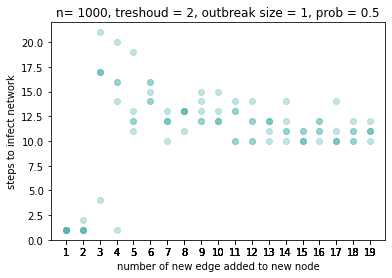

In [40]:
import matplotlib.pyplot as plt
from runtime import *

x = run_data['new_edge_num'].values.tolist()
time = calculate_infection_time(run_data)
plt.plot(x,time,'o', color = '#3CAEA3', alpha = 0.3)
plt.xlabel("number of new edge added to new node")
plt.ylabel("steps to infect network")
plt.title("n= 1000, treshoud = 2, outbreak size = 1, prob = 0.5")
plt.xticks(x)
plt.show()